# Statistiques Descriptives 2016

On se concentre sur l'année 2016, qui est celle pour laquelle les données sont les plus complètes. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
%pwd
%cd /Users/h2jw/

/Users/h2jw


In [23]:
fqms_2016 = pd.read_csv("Documents/GitHub/StatApp_2020/Data/FQMs/fqms_2016.csv",low_memory=False)
histo_2016 = pd.read_csv("Downloads/histo_2016.csv")

In [24]:
histo_2016 = histo_2016.astype({'Jour': 'datetime64[M]'})
fqms_2016 = fqms_2016.astype({'Date du vol': 'datetime64[M]'})

In [25]:
fqms_2016.head(5)

,Unnamed: 0,Jour,Tav,Cie,Ligne,A/D,Aérog,Hor,Sièges Corrections_ICI,Pax Estimés,...,Cpt Mvt,Faisc. IATA,Date du vol,NB Sieges specif,NB Sieges Standard,Date Equiv,CLE SYNTH.,%Rempl,Semaine,CLE S/T
0,0,1,320,EZY,4060,A,OS,08:00:00,180,129.60,...,1,000A,2016-01-01,180,150,2015-01-05,OSA2,0.72,1,OS1A1
1,1,1,BEH,UD,450,A,OS,08:10:00,19,13.68,...,1,000A,2016-01-01,19,8,2015-01-05,OSA2,0.72,1,OS1A1
2,2,1,320,EZY,4020,A,OS,10:00:00,180,129.60,...,1,000A,2016-01-01,180,150,2015-01-05,OSA2,0.72,1,OS1A1
3,3,1,320,EZY,4062,A,OS,10:25:00,180,129.60,...,1,000A,2016-01-01,180,150,2015-01-05,OSA2,0.72,1,OS1A1
4,4,1,320,EZY,4058,A,OS,11:20:00,180,129.60,...,1,000A,2016-01-01,180,150,2015-01-05,OSA2,0.72,1,OS1A1


In [26]:
histo_2016.head(5)

,Unnamed: 0,Jour,Horaire théorique,Horaire bloc,Compagnie,Code IATA compagnie,Code OACI compagnie,Numéro de vol,Faisceau facturation,Pays,...,Plateforme code,Libellé plateforme,Aérogare,Libellé aérogare,Terminal,Libellé terminal,Nombre de mouvements réalisés,Nombre de vol atterris décollés,Nombre de passagers réalisés,Sièges Corrections_ICI
0,44353,2016-07-01,2016/07/31 16:10:00,2016/07/31 18:53:00,CUBANA,CU,CUB,CU445,International,CUBA,...,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1,1,252,262.0
1,44354,2016-03-01,2016/03/30 19:15:00,2016/03/30 19:33:00,HOP!,A5,HOP,A59601,Schengen,ESPAGNE,...,ORY,Orly,ORYO,ORY OUEST,ORYW,ORY OUEST,1,1,43,50.0
2,44355,2016-01-01,2016/01/23 15:25:00,2016/01/23 16:57:00,CORSAIR INTL,SS,CRL,CRL990,International,SENEGAL,...,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1,1,298,350.0
3,44356,2016-01-01,2016/01/20 19:20:00,2016/01/20 19:31:00,CORSAIR INTL,SS,CRL,CRL874,International,MADAGASCAR,...,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1,1,149,350.0
4,44357,2016-01-01,2016/01/05 09:55:00,2016/01/05 09:41:00,CORSAIR INTL,SS,CRL,CRL925,Dom Tom,FRANCE MARTINIQUE,...,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1,1,332,350.0


## Visualisation par faisceau et type de mouvement par mois :

On compare le nombre réalisé de passagers par mois sur chaque faisceau aux prévisions.


In [27]:
faisceaux = ["National","Schengen","Dom Tom","Autre UE","International"]

In [28]:
histo_depart = histo_2016[histo_2016['Type de mouvement']=="Départ"]
histo_arrivee = histo_2016[histo_2016['Type de mouvement']=="Arrivée"]

fqms_depart = fqms_2016[fqms_2016['A/D']=='A']
fqms_arrivee = fqms_2016[fqms_2016['A/D']=='D']

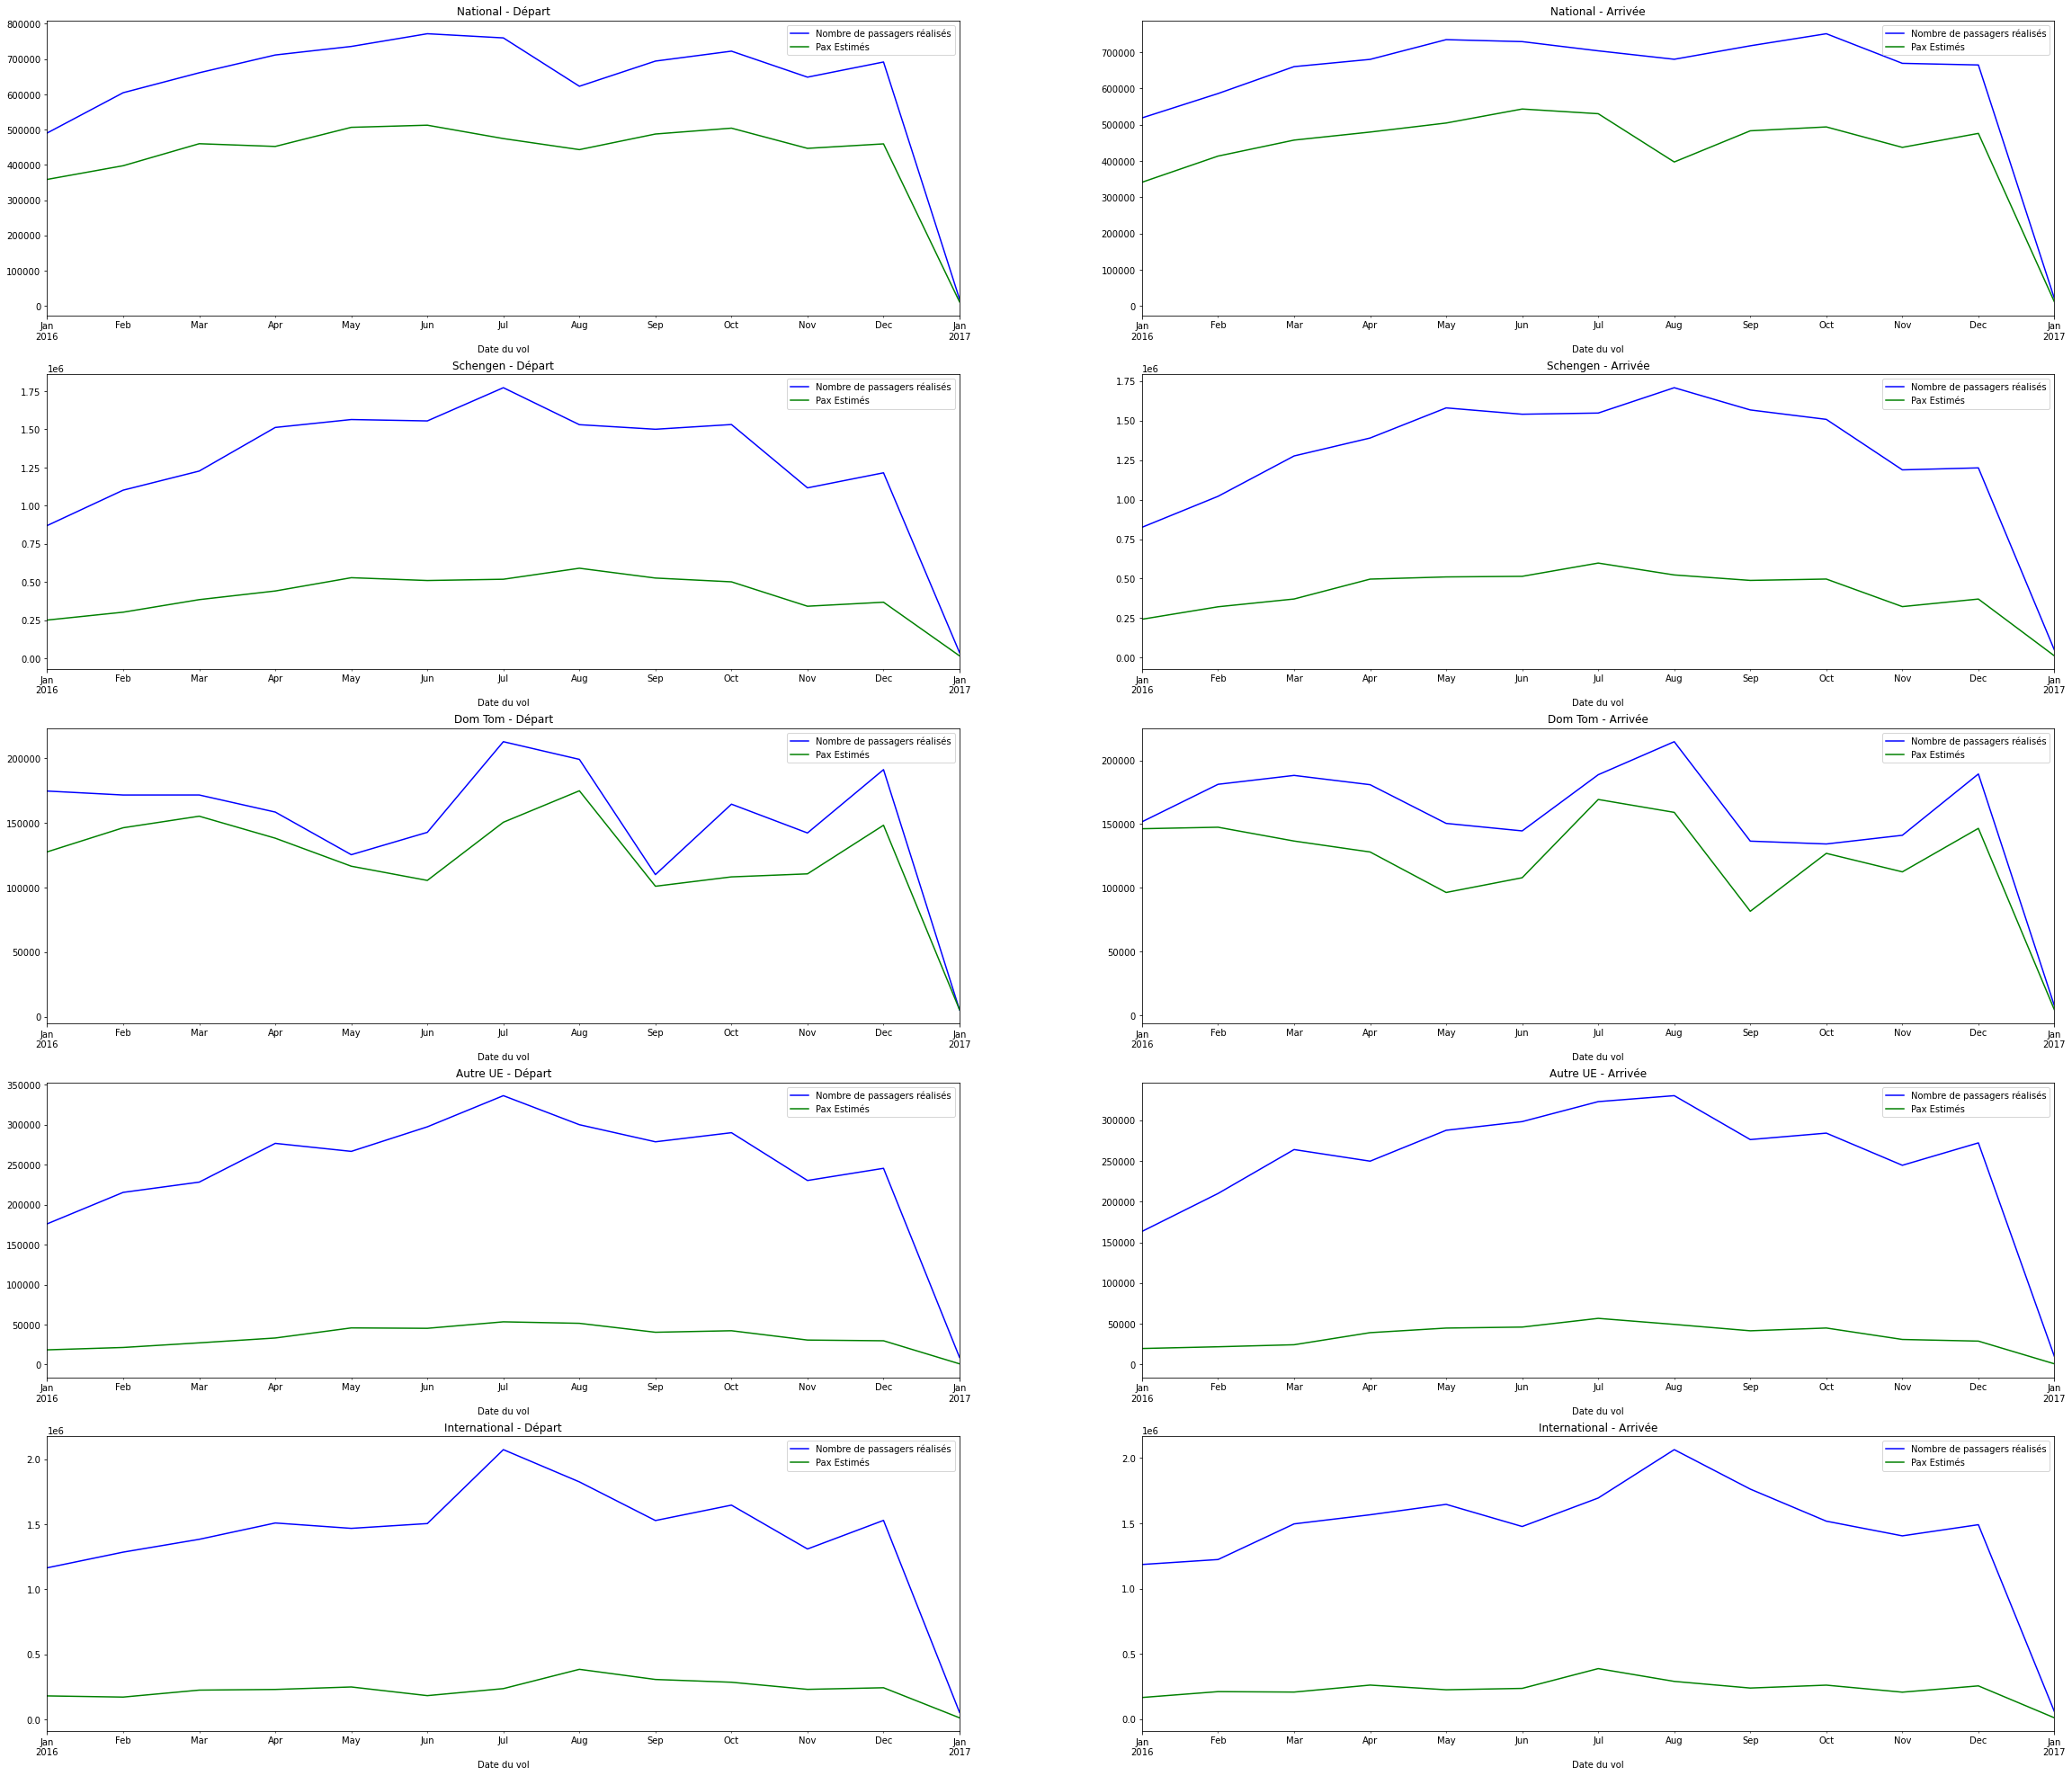

In [52]:
fig, ax = plt.subplots(5,2, figsize=(40,35))

for i in range(5) :
    ax[(i,0)].set_title(faisceaux[i]+" - Départ")
    
    histo_depart[histo_depart['Faisceau facturation'].isin([faisceaux[i]])].groupby('Jour').agg({'Nombre de passagers réalisés':'sum'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='blue')
    fqms_depart[fqms_depart['Faisceau'].isin([i+1])].groupby('Date du vol').agg({'Pax Estimés':'sum'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='green')
    
    ax[(i,1)].set_title(faisceaux[i]+" - Arrivée")
    
    histo_arrivee[histo_arrivee['Faisceau facturation'].isin([faisceaux[i]])].groupby('Jour').agg({'Nombre de passagers réalisés':'sum'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='blue')
    fqms_arrivee[fqms_arrivee['Faisceau'].isin([i+1])].groupby('Date du vol').agg({'Pax Estimés':'sum'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='green')

plt.savefig('Evolution_mois_faisceau_type_mvmt.png')
    

On remarque un écart très conséquent entre les prévisions et le nombre de passagers effectivement embarqués.

## Etude des compagnies


In [43]:
histo_2016 = histo_2016.astype({'Jour': 'datetime64[ns]'})
fqms_2016 = fqms_2016.astype({'Date du vol': 'datetime64[ns]'})

On commence par regarder comment sont codées les compagnies dans leurs deux bases.

In [57]:
fqms_2016[['Cie']].drop_duplicates().value_counts().sum()

39

In [58]:
histo_2016[['Compagnie']].drop_duplicates().value_counts().sum()

397

On remarque qu'il y a beaucoup plus de compagnies présentes dans les vols réalisés que dans les prévisions. 

In [46]:
resultat = fqms_2016.Cie.value_counts()
print(resultat)

AF     84807
TO     27324
EZY    17866
VY     17841
AT      9460
ZI      8987
A5      8668
TP      7621
AH      5760
TU      4743
XK      4670
IB      3949
UX      3887
SS      3445
TX      3372
BA      2736
DY      2456
WX      2394
EZS     2352
T7      2016
AZ      1798
T3      1676
PC      1456
EC      1422
TB      1359
AB      1294
BE      1242
UD       880
JAF      742
KM       718
HV       519
FV       404
FI       396
IR       208
CU       134
TF        31
D8        24
PLM       23
BF        18
Name: Cie, dtype: int64


In [47]:
resultat = histo_2016.Compagnie.value_counts()
print(resultat)

AIR FRANCE              316142
EASYJET AIRLINES CO      49740
TRANSAVIA.COM            27544
VUELING AIRLINES SA      24800
FEDEX                    16853
                         ...  
ADVANCED AIR SUPPORT         1
WIDEX A/S                    1
SOUTH AFRICAN AIR FO         1
NOVAIR                       1
CONDOR FLUGDIENST GM         1
Name: Compagnie, Length: 397, dtype: int64


## Visualisation par faisceau et type de mouvement par Air France

On remarque que seuls 3744 vols sur 84807 prévus par Air France ont été réalisés.

In [48]:
fqms_tronque = fqms_2016[fqms_2016['Cie'] == "AF"]
histo_tronque = histo_2016[histo_2016['Compagnie'] == "AIR FRANCE"]

In [49]:
fqms_depart2 = fqms_tronque[fqms_tronque['A/D']=='A']
fqms_arrivee2 = fqms_tronque[fqms_tronque['A/D']=='D']

histo_depart2 = histo_tronque[histo_tronque['Type de mouvement']=="Départ"]
histo_arrivee2 = histo_tronque[histo_tronque['Type de mouvement']=="Arrivée"]

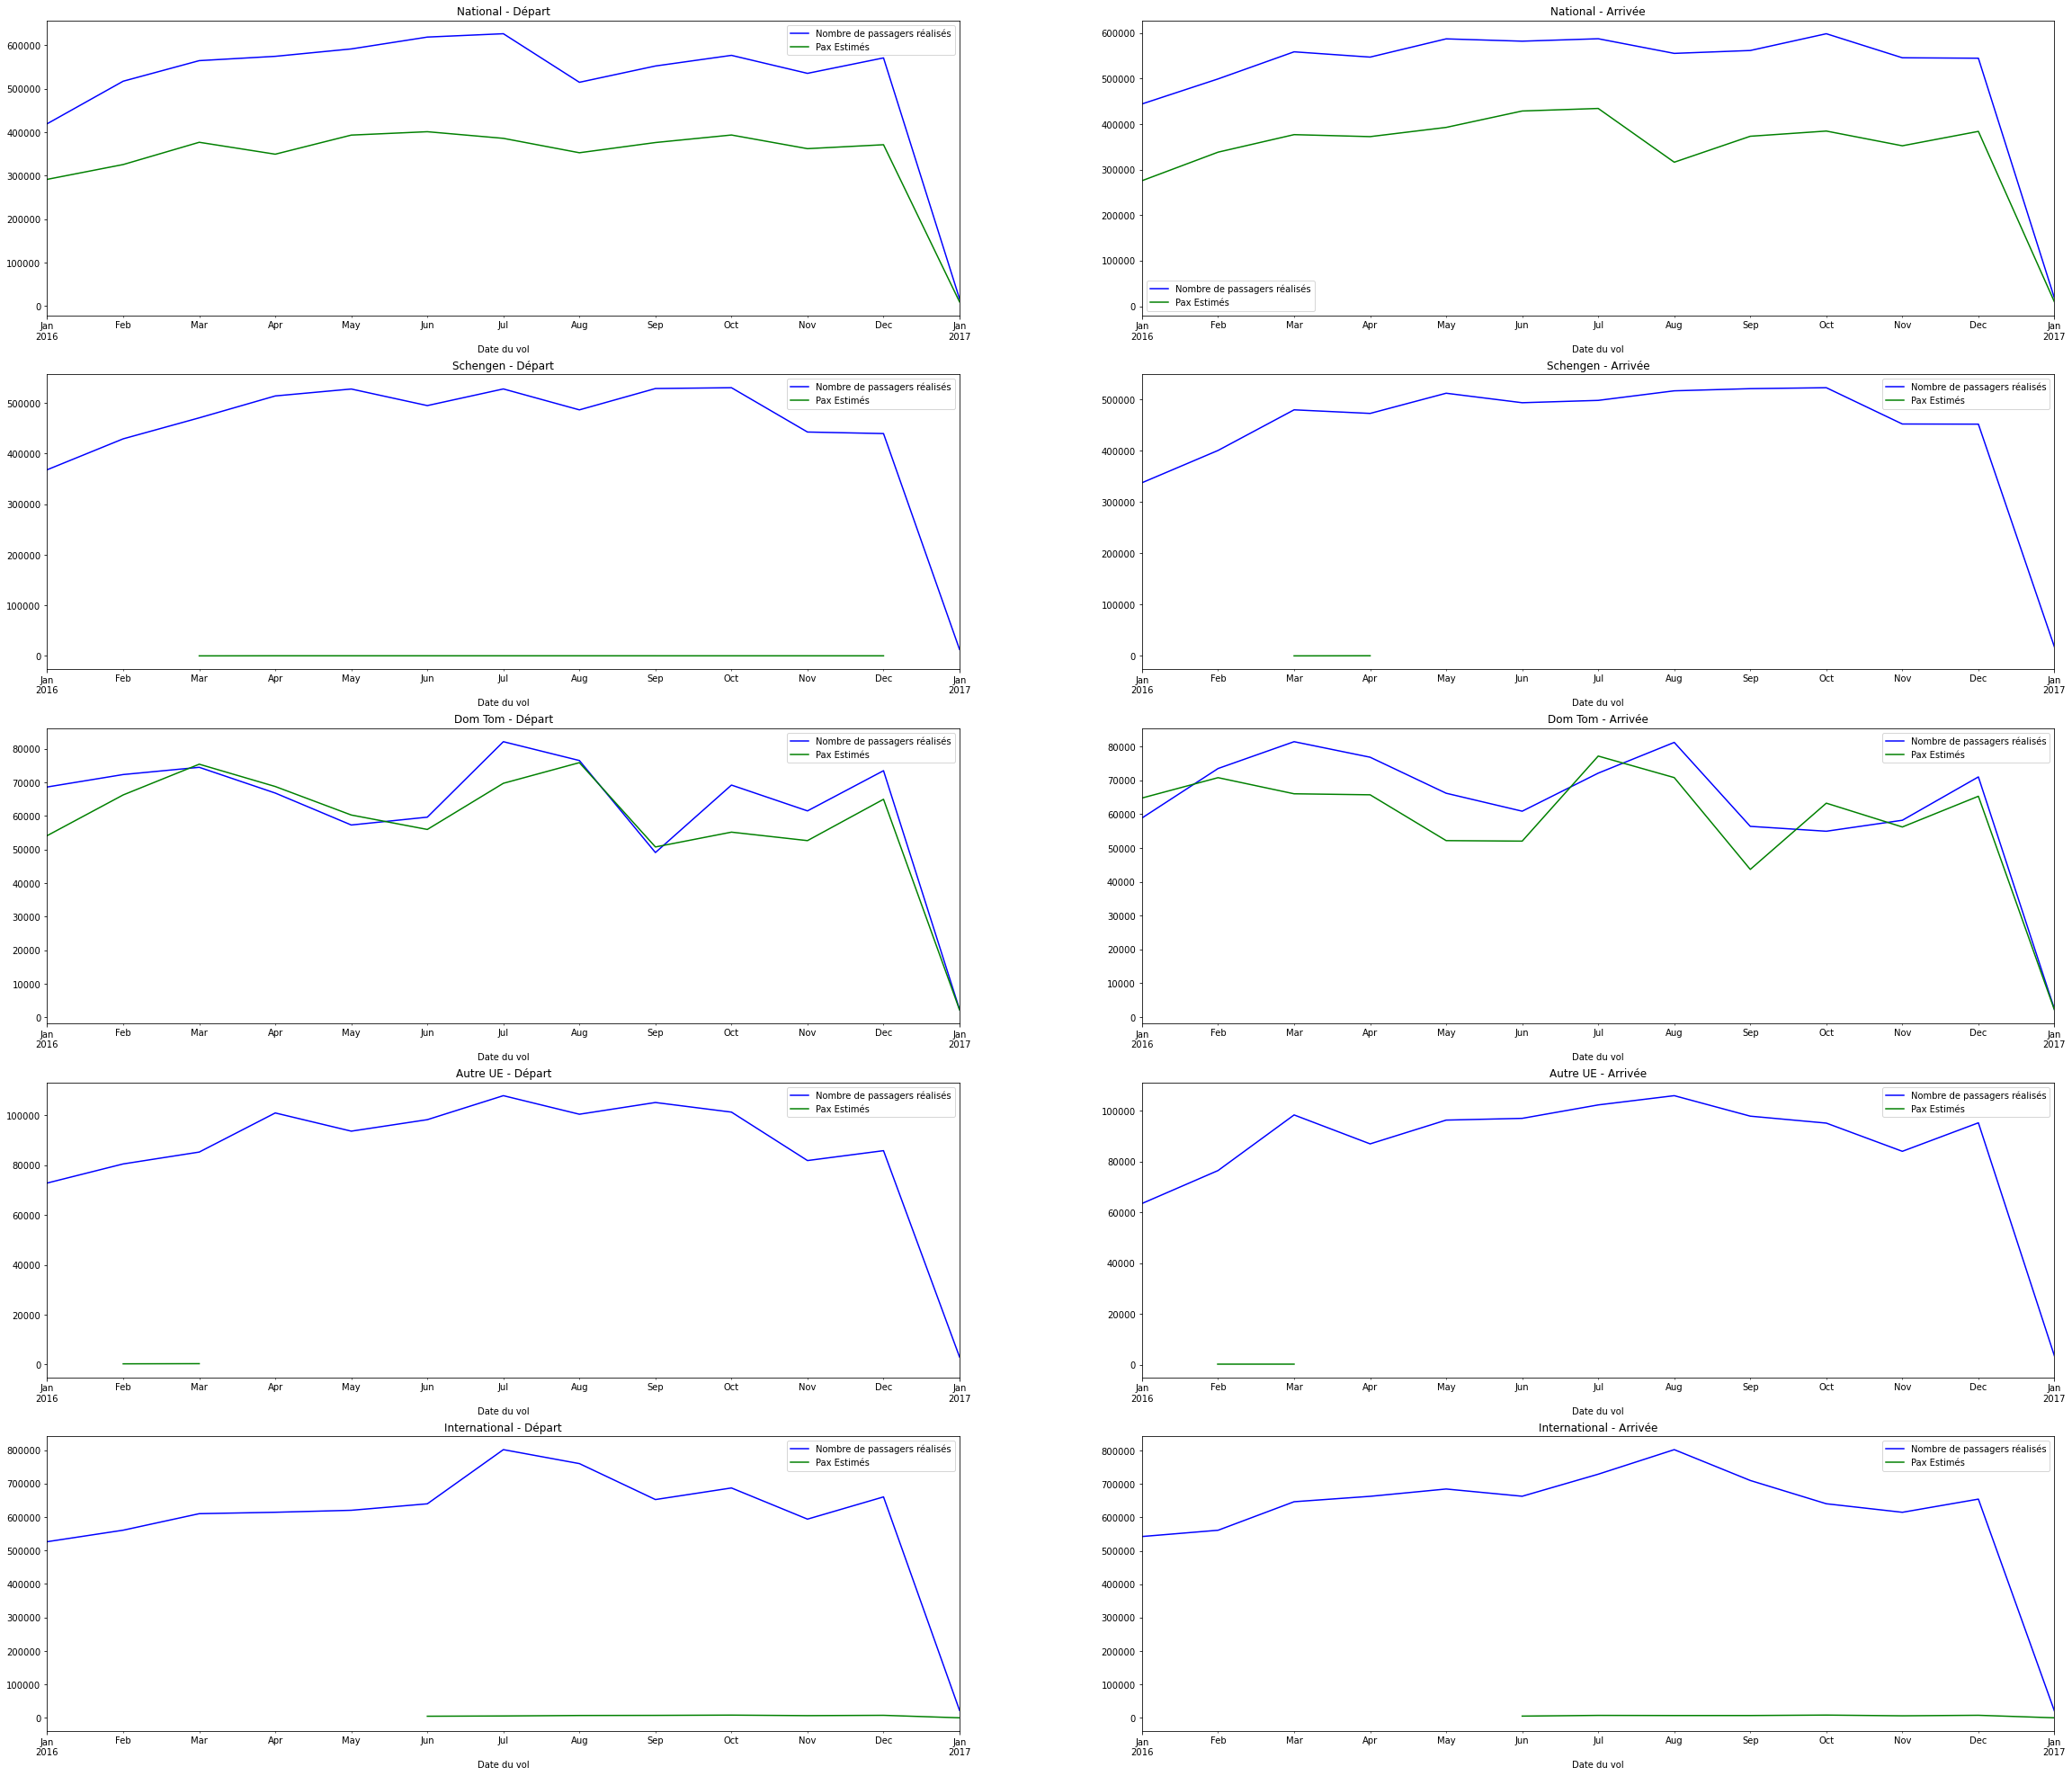

In [51]:
fig, ax = plt.subplots(5,2, figsize=(40,35))

for i in range(5) :
    ax[(i,0)].set_title(faisceaux[i]+" - Départ")
    
    histo_depart2[histo_depart2['Faisceau facturation'].isin([faisceaux[i]])].groupby('Jour').agg({'Nombre de passagers réalisés':'sum'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='blue')
    fqms_depart2[fqms_depart2['Faisceau'].isin([i+1])].groupby('Date du vol').agg({'Pax Estimés':'sum'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='green')
    
    ax[(i,1)].set_title(faisceaux[i]+" - Arrivée")
    
    histo_arrivee2[histo_arrivee2['Faisceau facturation'].isin([faisceaux[i]])].groupby('Jour').agg({'Nombre de passagers réalisés':'sum'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='blue')
    fqms_arrivee2[fqms_arrivee2['Faisceau'].isin([i+1])].groupby('Date du vol').agg({'Pax Estimés':'sum'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='green')
    
plt.savefig('Visualisation_fsc_tdm_AF.png')

En comparant le nombre de passagers prévu et celui réalisé uniquement par la compagnie Air France, on note que :

* Les données sont très lacunaires concernant le nombre de passagers prévus saufs pour les vols nationaux et depuis ou vers les DOM TOM.

* Le nombre de passagers prévus pour des vols nationaux paraît sous-estimés.


-> Revoir la base des fqms


## Visualisation par faisceau et type de mouvement pour Corse Air International (Corsairfly)

In [38]:
fqms_tronque2 = fqms_2016[fqms_2016['Cie'] == "SS"]
histo_tronque2 = histo_2016[histo_2016['Compagnie'] == "CORSAIR INTL"]

In [39]:
fqms_depart3 = fqms_tronque2[fqms_tronque2['A/D']=='A']
fqms_arrivee3 = fqms_tronque2[fqms_tronque2['A/D']=='D']

histo_depart3 = histo_tronque2[histo_tronque2['Type de mouvement']=="Départ"]
histo_arrivee3 = histo_tronque2[histo_tronque2['Type de mouvement']=="Arrivée"]

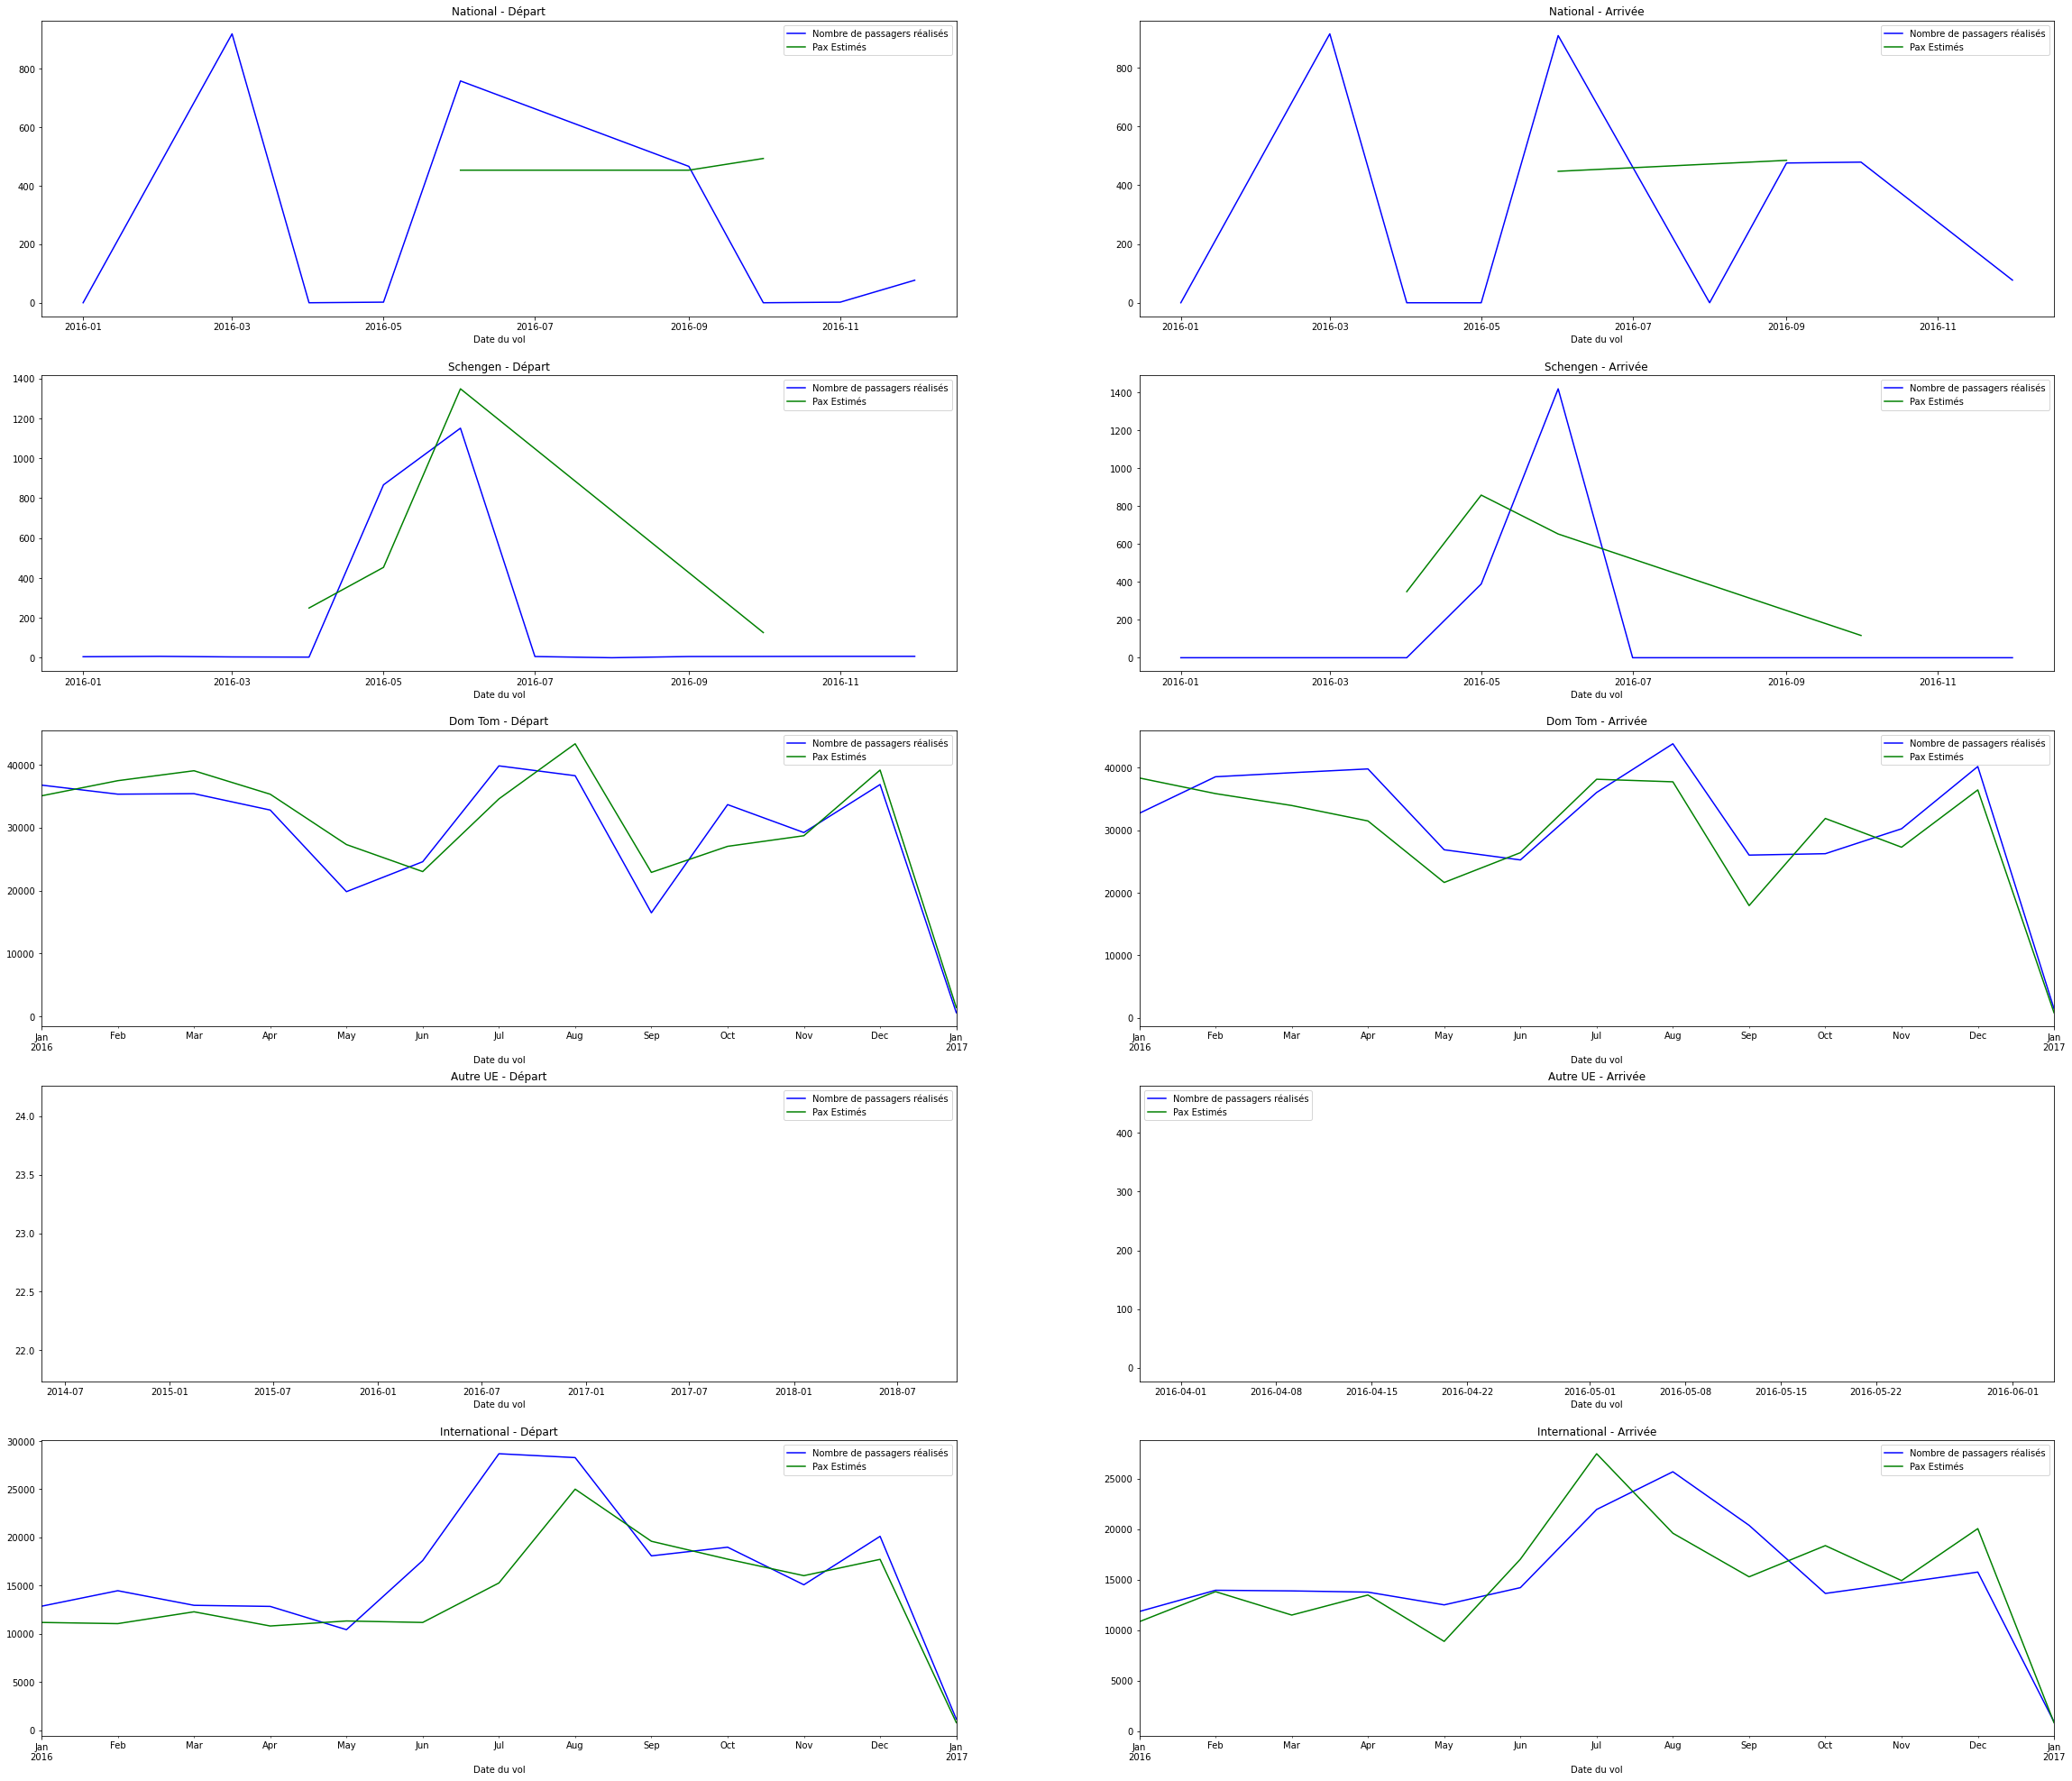

In [40]:
fig, ax = plt.subplots(5,2, figsize=(40,35))

for i in range(5) :
    ax[(i,0)].set_title(faisceaux[i]+" - Départ")
    
    histo_depart3[histo_depart3['Faisceau facturation'].isin([faisceaux[i]])].groupby('Jour').agg({'Nombre de passagers réalisés':'sum'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='blue')
    fqms_depart3[fqms_depart3['Faisceau'].isin([i+1])].groupby('Date du vol').agg({'Pax Estimés':'sum'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='green')
    
    ax[(i,1)].set_title(faisceaux[i]+" - Arrivée")
    
    histo_arrivee3[histo_arrivee3['Faisceau facturation'].isin([faisceaux[i]])].groupby('Jour').agg({'Nombre de passagers réalisés':'sum'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='blue')
    fqms_arrivee3[fqms_arrivee3['Faisceau'].isin([i+1])].groupby('Date du vol').agg({'Pax Estimés':'sum'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='green')
    

En comparant le nombre de passagers prévu et celui réalisé uniquement par la compagnie Corsairfly, on note que :

* Les résultats paraissent cohérents uniquement pour les vols internationaux et ceux vers et depuis les DOM TOM.

* Les données sont lacunaires pour les autres types de vols.

-> Revoir les bases 


## Visualisation par faisceau et type de mouvement pour les vols depuis et vers les DOM TOM

Le faisceau DOM TOM celui avec les résultats les plus convaincants.

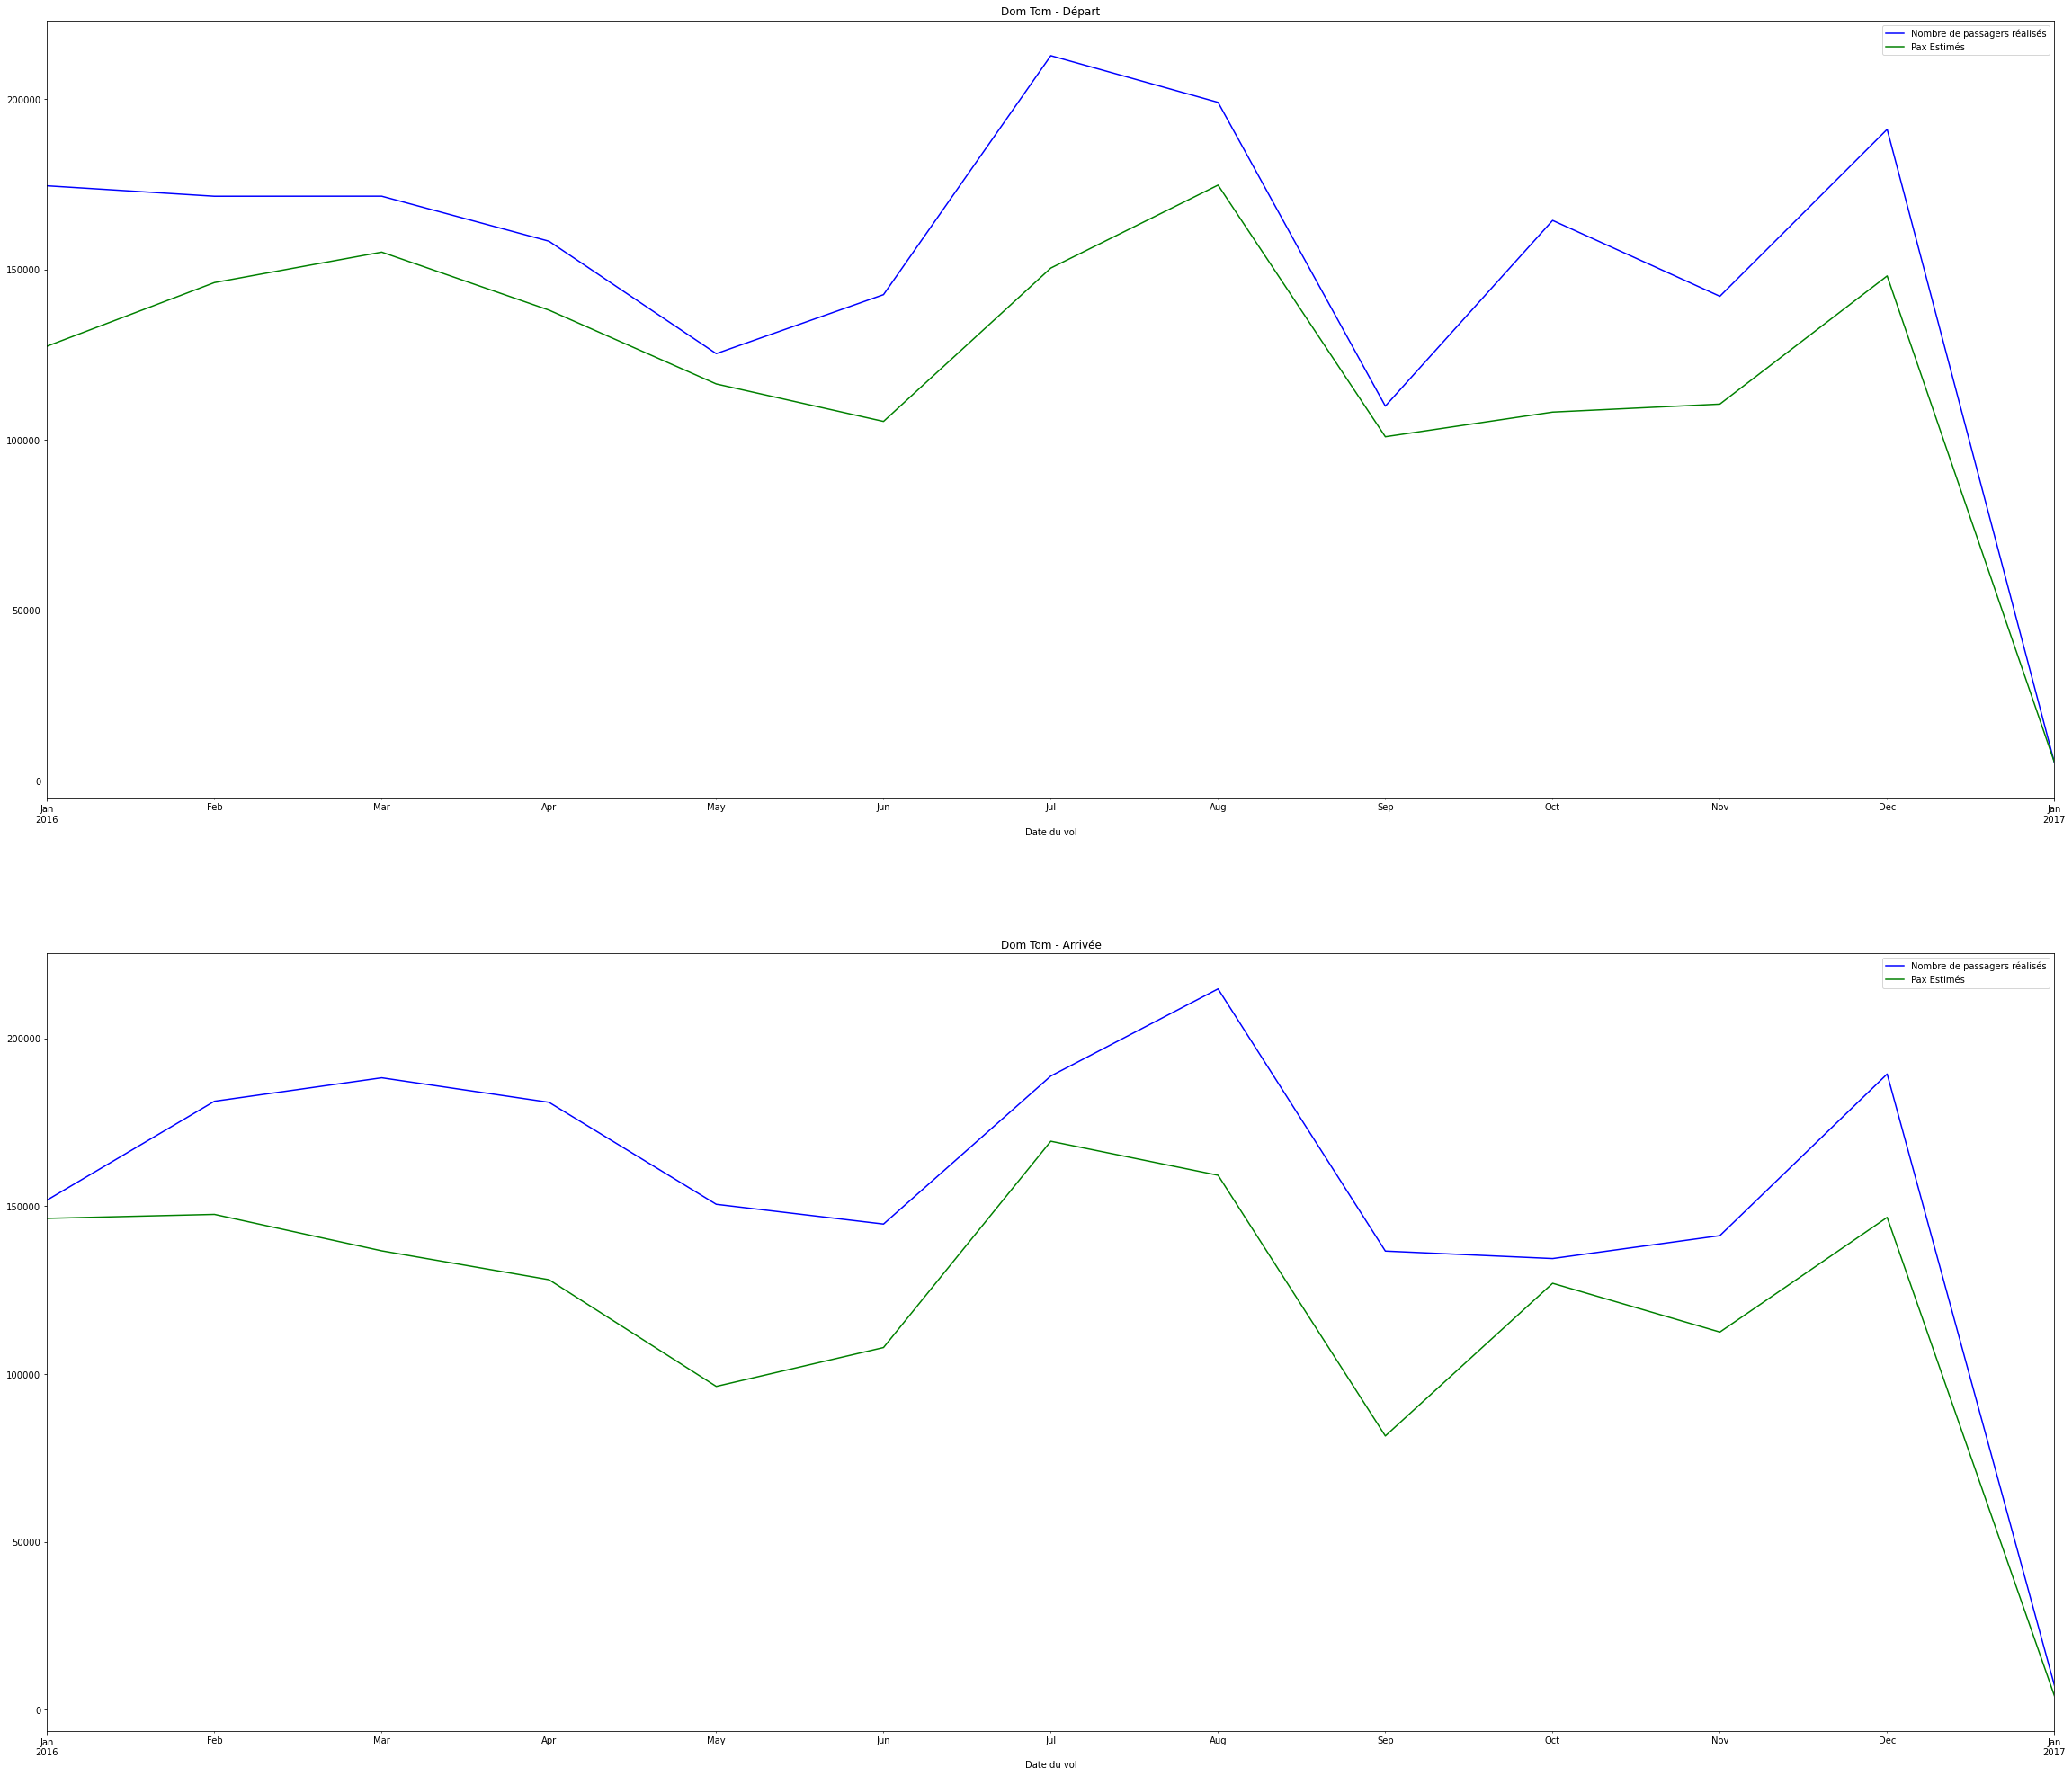

In [54]:
fig, ax = plt.subplots(2,1, figsize=(40,35))


ax[0].set_title(faisceaux[2]+" - Départ")
histo_depart[histo_depart['Faisceau facturation'].isin([faisceaux[2]])].groupby('Jour').agg({'Nombre de passagers réalisés':'sum'}).plot(ax = ax[0],legend=True, subplots=True,color='blue')
fqms_depart[fqms_depart['Faisceau'].isin([2+1])].groupby('Date du vol').agg({'Pax Estimés':'sum'}).plot(ax = ax[0],legend=True, subplots=True,color='green')
    
ax[1].set_title(faisceaux[2]+" - Arrivée")
    
histo_arrivee[histo_arrivee['Faisceau facturation'].isin([faisceaux[2]])].groupby('Jour').agg({'Nombre de passagers réalisés':'sum'}).plot(ax = ax[1],legend=True, subplots=True,color='blue')
fqms_arrivee[fqms_arrivee['Faisceau'].isin([2+1])].groupby('Date du vol').agg({'Pax Estimés':'sum'}).plot(ax = ax[1],legend=True, subplots=True,color='green')
    
plt.savefig('Visualisation_fsc_tdm_DOMTOM.png')